# Analise do Modelo Selecionado 

In [1]:
import os
import pandas as pd
import seaborn as sns
from random import sample
import matplotlib.pyplot as plt

In [2]:
df_cm = pd.read_excel(r"E:\project\segunda_fase\project_maio\confusion_matrix2.xlsx", index_col=0)

Este script carrega uma matriz de confusão completa a partir de um arquivo Excel, identifica os pares de classes com maior confusão e gera uma matriz reduzida  para visualização.

In [3]:
# Selecionar pares com maior confusão
top_confusions = (
    df_cm.stack()
    .rename_axis(['true_label', 'pred_label'])
    .reset_index(name='count')
    .query("true_label != pred_label and count > 0")
    .sort_values(by='count', ascending=False)
    .head(10)
)

# Classes envolvidas e matriz reduzida
classes_env = sorted(set(top_confusions[['true_label', 'pred_label']].values.ravel()))
conf_matrix_reduced = df_cm.loc[classes_env, classes_env]

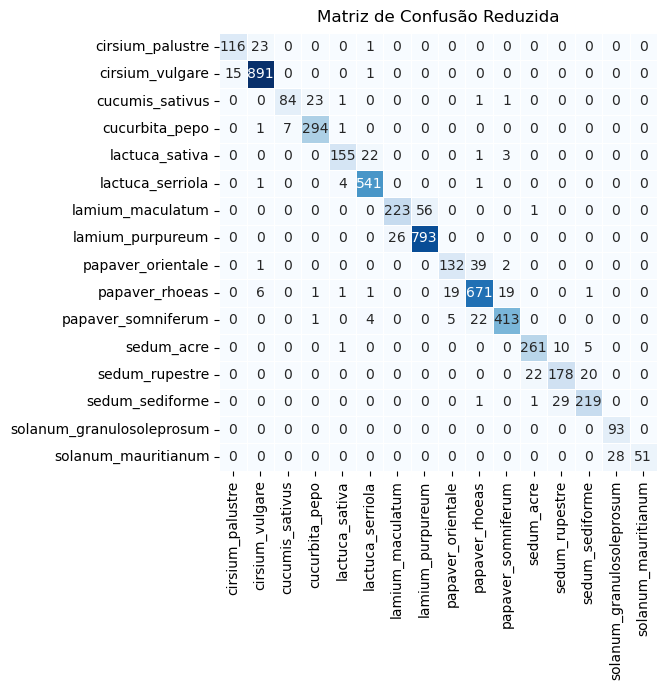

In [4]:
# Plotar matriz reduzida
plt.figure(figsize=(8, 7))
sns.heatmap(conf_matrix_reduced, annot=True, fmt='d', cmap="Blues", linewidths=0.5, square=True, cbar=False)
plt.title("Matriz de Confusão Reduzida", fontsize=12, pad=8)
plt.xlabel("", fontsize=10)
plt.ylabel("", fontsize=10)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

O script abaixo tem como objetivo exibir exemplos visuais de duas espécies que apresentaram maior confusão durante a classificação do modelo. A função ***mostrar_exemplos*** seleciona aleatoriamente imagens de duas pastas, cada uma correspondente a uma classe, e as organiza lado a lado em uma grade para facilitar a comparação.

No exemplo, foram utilizadas imagens de Lamium maculatum e Lamium purpureum, espécies com o maior indice de confusão pelo modelo ResNet-50. Essa visualização auxilia na análise das semelhanças visuais entre as classes, permitindo compreender melhor as dificuldades do modelo em diferenciá-las e identificar possíveis melhorias.

In [5]:
def mostrar_exemplos(pasta1, pasta2, n=5, label1='Classe 1', label2='Classe 2'):
    fig, axes = plt.subplots(2, n, figsize=(n*2, 4))

    for row, (pasta, label) in enumerate([(pasta1, label1), (pasta2, label2)]):
        for col, img in enumerate(sample(os.listdir(pasta), n)):
            axes[row, col].imshow(plt.imread(os.path.join(pasta, img)))
            axes[row, col].axis('off')
        axes[row, 0].set_ylabel(label, fontsize=12, rotation=0, labelpad=30, va='center')

    plt.tight_layout()
    plt.show()

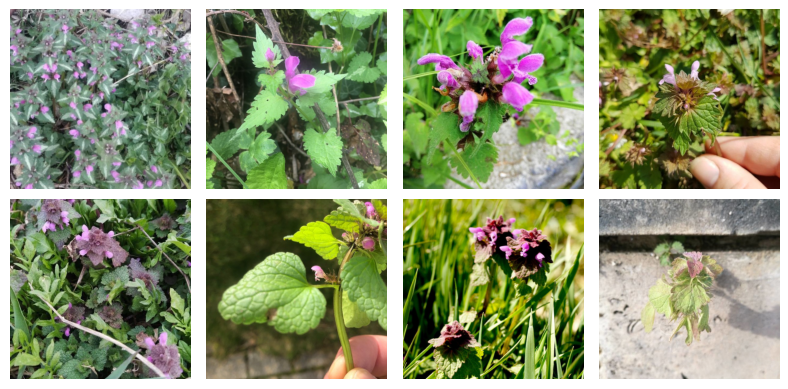

In [6]:
mostrar_exemplos(
    r"E:\project\segunda_fase\project_maio\dataset_splits\train\lamium_maculatum",
    r"E:\project\segunda_fase\project_maio\dataset_splits\train\lamium_purpureum",
    n=4,
    label1='Lamium maculatum',
    label2='Lamium purpureum'
)

Os dados apresentados abaixo foram extraídos diretamente dos logs gerados após a conclusão do treinamento do modelo ResNet50, configurado para 10 épocas de execução.
Durante o processo, foram registradas as métricas de perda (loss) e acurácia (accuracy) para os conjuntos de treino e validação, possibilitando a análise do comportamento do modelo ao longo das iterações.

Os valores evidenciam a redução progressiva da perda e o aumento consistente da acurácia, tanto no treinamento quanto na validação, demonstrando que o modelo foi capaz de aprender e generalizar os padrões das imagens ao longo das épocas.

In [7]:
caminho_arquivo = r"E:\publicacao_GIT\results\logs_resnet50_treinamento.xlsx"

In [8]:
df = pd.read_excel(caminho_arquivo)
epochs = df['Epoch']
train_loss = df['Train Loss']
val_loss = df['Validation Loss']
train_acc = df['Train Accuracy']
val_acc = df['Validation Accuracy']

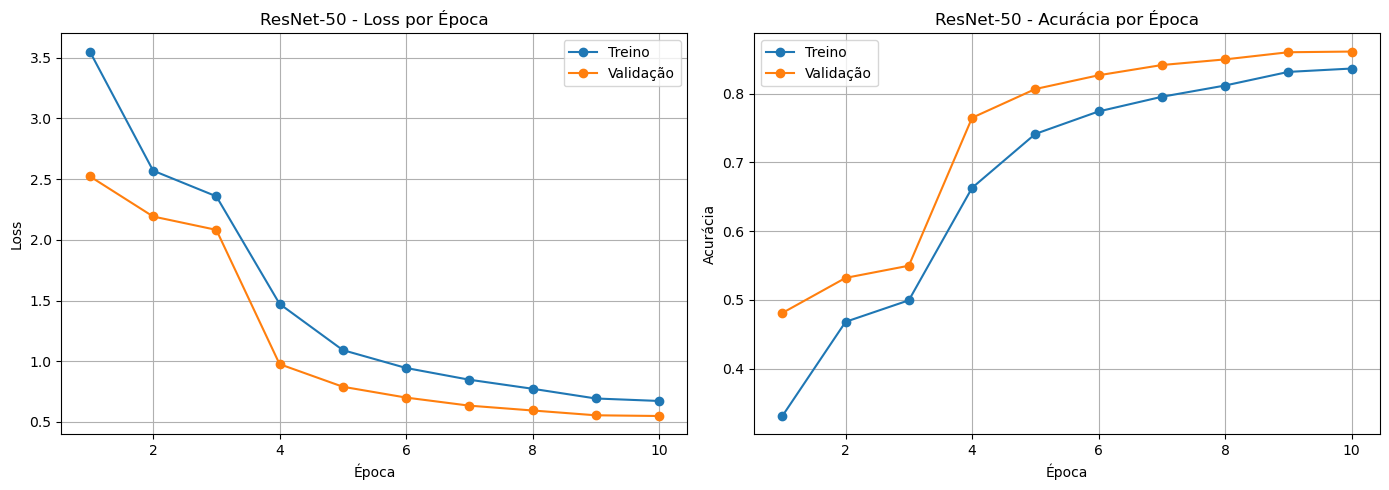

In [9]:
plt.figure(figsize=(14, 5))

# Curva de Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Treino", marker='o')
plt.plot(epochs, val_loss, label="Validação", marker='o')
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("ResNet-50 - Loss por Época")
plt.legend()
plt.grid(True)

# Curva de Acurácia
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label="Treino", marker='o')
plt.plot(epochs, val_acc, label="Validação", marker='o')
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("ResNet-50 - Acurácia por Época")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Esses resultados indicam que o treinamento da ResNet50 foi eficaz, apresentando um ganho expressivo de desempenho e estabilidade das métricas entre as primeiras e últimas épocas, sem indícios relevantes de overfitting dentro do intervalo do analisado.